In [1]:
%load_ext autoreload
%autoreload 2

In [46]:
import numpy as np
import os
import sys

module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utils import load_nifti
from helpers import strip
from helpers import resize
from helpers import rotation
from helpers import shear
from helpers import zoom
from helpers import shift
from helpers import get_rand_z_chunk
from helpers import show_sample

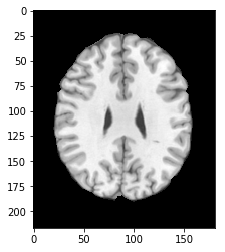

In [23]:
# Show sample.
scan = load_nifti('./brain.nii.gz')
show_sample(scan, slc=100)

(181, 217, 181, 1)
(147, 182, 158, 1)


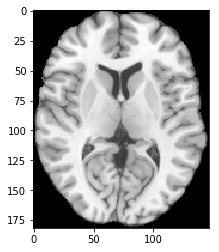

In [56]:
# Strip a volume.
scan = load_nifti('./brain.nii.gz')
print(scan.shape)
stripped_scan = strip(scan)
print(stripped_scan.shape)
show_sample(stripped_scan)

(181, 217, 181, 1)
(211, 287, 291, 1)


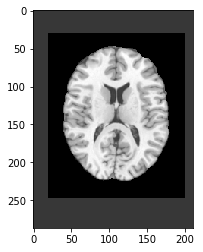

In [103]:
# Fill a volume.
from helpers import fill
scan = load_nifti('./brain.nii.gz')
print(scan.shape)
filled_scan = fill(scan, 10, 20, 30, 40, 50, 60, cval=1000000.0)
print(filled_scan.shape)
show_sample(filled_scan, )

(181, 217, 181, 1)
(500, 100, 100, 1)


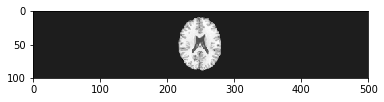

In [45]:
# Resize a volume (with keeping its aspect ratio).
scan = load_nifti('./brain.nii.gz')
print(scan.shape)
resized_scan = resize(scan, (500, 100, 100))
print(resized_scan.shape)
show_sample(resized_scan)

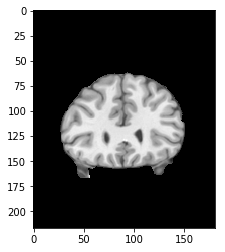

In [4]:
# Rotation around x-axis.
scan = load_nifti('./brain.nii.gz')
scan = rotation(scan, 90., 0., 0.)
show_sample(scan)

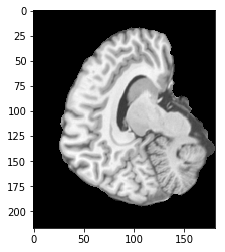

In [5]:
# Rotation around y-axis.
scan = load_nifti('./brain.nii.gz')
scan = rotation(scan, 0., 90., 0.)
show_sample(scan)

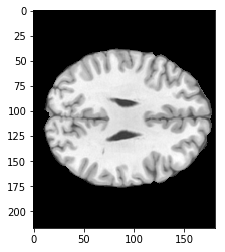

In [6]:
# Rotation around z-axis.
scan = load_nifti('./brain.nii.gz')
scan = rotation(scan, 0., 0., 90.)
show_sample(scan, slc=100)

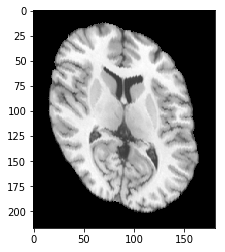

In [7]:
# Shear along x-axis in xy-plane.
scan = load_nifti('./brain.nii.gz')
scan = shear(scan, 0.3, 0., 0., 0., 0., 0.)
show_sample(scan)

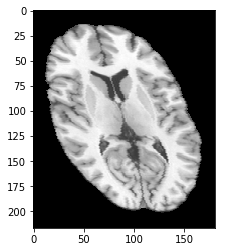

In [8]:
# Shear along y-axis in xy-plane.
scan = load_nifti('./brain.nii.gz')
scan = shear(scan, 0., 0.3, 0., 0., 0., 0.)
show_sample(scan)

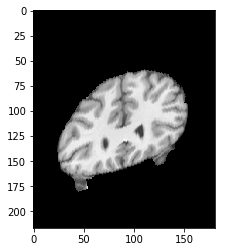

In [9]:
# Shear along x-axis in xz-plane.
scan = load_nifti('./brain.nii.gz')
scan = shear(scan, 0., 0., 0.3, 0., 0., 0.)
# rotate around x-axis to see xz-plane
scan = rotation(scan, 90., 0., 0.)
show_sample(scan)

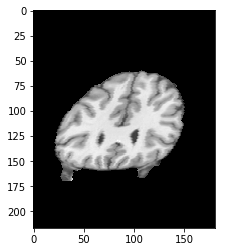

In [10]:
# Shear along z-axis in xz-plane.
scan = load_nifti('./brain.nii.gz')
scan = shear(scan, 0., 0., 0., 0.3, 0., 0.)
# rotate around x-axis to see xz-plane
scan = rotation(scan, 90., 0., 0.)
show_sample(scan)

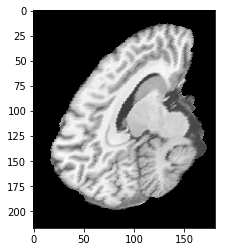

In [11]:
# Shear along y-axis in yz-plane.
scan = load_nifti('./brain.nii.gz')
scan = shear(scan, 0., 0., 0., 0., 0.3, 0.)
# rotate around y-axis to see yz-plane
scan = rotation(scan, 0., 90., 0.)
show_sample(scan)

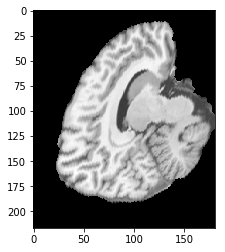

In [12]:
# Shear along z-axis in yz-plane
scan = load_nifti('./brain.nii.gz')
scan = shear(scan, 0., 0., 0., 0., 0., 0.3)
# rotate around y-axis to see yz-plane
scan = rotation(scan, 0., 90., 0.)
show_sample(scan)

/home/zeus/.pyenv/versions/3.5.3/envs/unet_brain/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


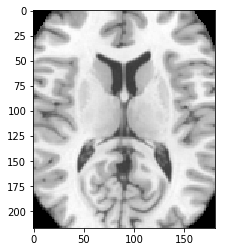

In [13]:
# Zoom in.
scan = load_nifti('./brain.nii.gz')
scan = zoom(scan, 1.5)
show_sample(scan)

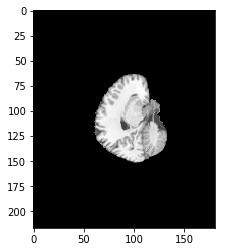

In [14]:
# Zoom out.
scan = load_nifti('./brain.nii.gz')
scan = zoom(scan, 0.5)
# rotate around y-axis to see yz-plane
scan = rotation(scan, 0., 90., 0.)
show_sample(scan)

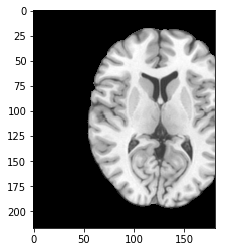

In [15]:
# Shift in x-direction.
scan = load_nifti('./brain.nii.gz')
scan = shift(scan, 0.2, 0., 0.)
show_sample(scan)

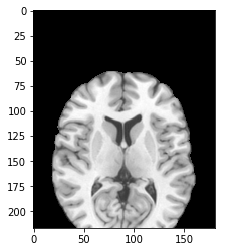

In [16]:
# Shift in y-direction.
scan = load_nifti('./brain.nii.gz')
scan = shift(scan, 0., 0.2, 0.)
show_sample(scan)

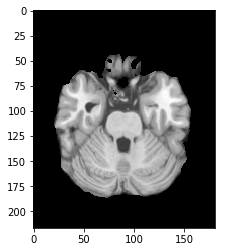

In [17]:
# Shift in z-direction
scan = load_nifti('./brain.nii.gz')
scan = shift(scan, 0., 0., 0.2)
show_sample(scan)

In [18]:
scan = load_nifti('./brain.nii.gz')
seg = load_nifti('./brain_seg.nii.gz')
scan, seg = get_rand_z_chunk((scan, seg), 4, 0.1)
for i in range(scan.shape[2]):
    show_sample(scan, slc=i)

ValueError: could not broadcast input array from shape (181,217,4,1) into shape (181,217,5,1)

In [ ]:
scan = load_nifti('./brain.nii.gz')
seg = load_nifti('./brain_seg.nii.gz')
scan, seg = get_rand_z_chunk((scan, seg), 4, 0.1)
for i in range(seg.shape[2]):
    show_sample(scan, slc=i)
    show_sample(seg, slc=i)